## This tool calculates your investments and stock growth, compounding monthly.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#make this tool able to calculate debt and negative interest

In [2]:
Principal = float(input('Initial Investment ($): '))
annualreturn = float(input('Expected Yearly % Return Rate: '))
InMo = float(input('Average Monthly Contributions ($): '))
years = int(input('Years to Grow?: '))

Initial Investment ($): 5000
Expected Yearly % Return Rate: 8
Average Monthly Contributions ($): 500
Years to Grow?: 20


In [4]:
#pd.set_option('display.float_format', lambda x: '%.2f' % x)

def invest(P, r, inmo, y):
    Balance=[P]
    Contributions=[P]
    Interest = [0] 
    monthlyreturn = (1+r*0.01)**(1/12.) #the multiplier, not percent
    Months=range(12*y+1)

    #we have starting investment values recorded, this compounds interest monthly. 
    #The values listed are at the beginning of each month
    for i in range(12*y):        
        Balance.append(Balance[i]*monthlyreturn + inmo)
        Contributions.append(Contributions[i]+inmo) #Total contributions

    df = pd.DataFrame([Months,Contributions,Balance], index='Months Contributions Balance'.split()).T
    df['Growth']=df['Balance']-df['Contributions']
    return df

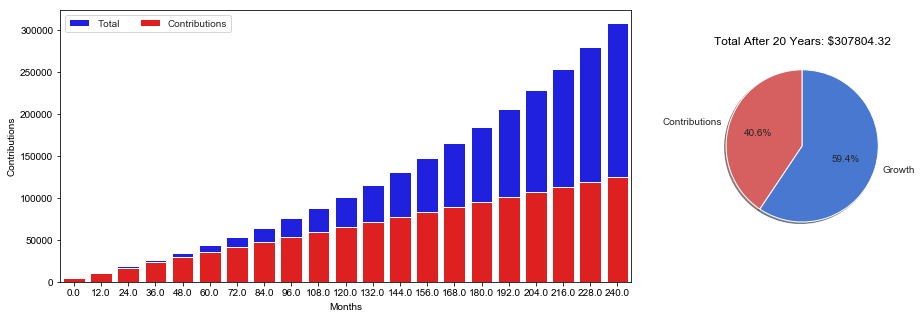

,Months,Contributions,Balance,Growth
0,0.0,5000.0,5000.000000,0.000000
12,12.0,11000.0,11616.943240,616.943240
24,24.0,17000.0,18763.241940,1763.241940
36,36.0,23000.0,26481.244535,3481.244535
48,48.0,29000.0,34816.687338,5816.687338
60,60.0,35000.0,43818.965566,8818.965566
72,72.0,41000.0,53541.426051,12541.426051
84,84.0,47000.0,64041.683375,17041.683375
96,96.0,53000.0,75381.961286,22381.961286
108,108.0,59000.0,87629.461429,28629.461429


In [5]:
df1 = invest(Principal, annualreturn, InMo, years)

columns = ['Contributions', 'Growth']
a = df1[columns].tail(1).round(3).values[0]

f, ax = plt.subplots(1,2,figsize=(15,5), gridspec_kw={'width_ratios': [3, 1]})

sns.set_style('whitegrid')
sns.set_palette('muted')

sns.barplot(x="Months", y="Balance", data=df1[::12],label="Total", color="b", ax = ax[0])
sns.barplot(x="Months", y="Contributions", data=df1[::12],label="Contributions", color="r", ax = ax[0])
ax[0].legend(ncol=2, loc="upper left", frameon=True)

ax[1].pie(a, startangle=90, shadow=True, colors = ['#d65f5f','#4878d0'], labels = columns, autopct='%1.1f%%')
ax[1].set_title('Total After ' + str(years)+ ' Years: $' + str(round(df1['Balance'].iloc[-1],2)))
plt.show()
df1[::12]